TUGAS BESAR DATA MINING 

NAMA : SYA RAIHAN HEGGI 

NIM : 1301184219

KELAS : IF-41-GAB01

In [92]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [93]:
df_x = pd.read_csv("processed_train.csv",usecols=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])
df_y = pd.read_csv("processed_train.csv",usecols=['fraud'])

In [94]:
df_x.shape

(240, 4)

# SPLIT DATA 

In [95]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.30,random_state=5)

# ANN MODEL 

In [96]:
model = models.Sequential([
    layers.Dense(2000, input_dim=4, activation='relu'),
    layers.Dense(500, activation='softmax'),
    layers.Dense(500, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30)


Epoch 1/30
6/6 [==============================] - 0s 8ms/step - loss: 0.2459 - accuracy: 0.4014
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 0.2296 - accuracy: 0.1162
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 0.2125 - accuracy: 0.1333
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1917 - accuracy: 0.1278
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1693 - accuracy: 0.1261
Epoch 6/30
6/6 [==============================] - 0s 12ms/step - loss: 0.1460 - accuracy: 0.1209
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 0.1324 - accuracy: 0.1910
Epoch 8/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1228 - accuracy: 0.8621
Epoch 9/30
6/6 [==============================] - 0s 8ms/step - loss: 0.1005 - accuracy: 0.8910
Epoch 10/30
6/6 [==============================] - 0s 9ms/step - loss: 0.1066 - accuracy: 0.7788
Epoch 11/30
6/6 [=====================

## BUAT PREDIKSI 

In [97]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

## DATA TRAINING 

In [98]:
import warnings
warnings.filterwarnings('ignore')
y_pred_train = [np.argmax(element) for element in y_pred_train]
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:",accuracy_score(y_train, y_pred_train)*100)


[[122  26]
 [  1  19]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       148
           1       0.42      0.95      0.58        20

    accuracy                           0.84       168
   macro avg       0.71      0.89      0.74       168
weighted avg       0.92      0.84      0.86       168

Accuracy: 83.92857142857143


## DATA TESTING

In [99]:
warnings.filterwarnings('ignore')
y_pred_test = [np.argmax(element) for element in y_pred_test]
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:",accuracy_score(y_test, y_pred_test)*100)

[[57  9]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        66
           1       0.31      0.67      0.42         6

    accuracy                           0.85        72
   macro avg       0.64      0.77      0.67        72
weighted avg       0.91      0.85      0.87        72

Accuracy: 84.72222222222221


# LOAD DATASET TEST

In [79]:
df_test = pd.read_csv("test.csv", sep="|", usecols=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])
df_realclass = pd.read_csv("DMC-2019-realclass.csv")
df_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids
0,4,467,88.48,4
1,3,1004,58.99,7
2,1,162,14.00,4
3,5,532,84.79,9
4,5,890,42.16,4


In [80]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
d = normalize.fit_transform(df_test[df_test.columns[:9]])
df_test = pd.DataFrame(d, columns=["trustLevel","totalScanTimeInSeconds","lineItemVoids","grandTotal"])

In [81]:
y_pred_testing = model.predict(df_test)

# EVALUATION 

In [82]:
warnings.filterwarnings('ignore')
y_pred_testing = [np.argmax(element) for element in y_pred_testing]
print(confusion_matrix(df_realclass, y_pred_testing))
print(classification_report(df_realclass, y_pred_testing))
print("Accuracy:",accuracy_score(df_realclass, y_pred_testing)*100)

[[474394      0]
 [ 23727      0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    474394
           1       0.00      0.00      0.00     23727

    accuracy                           0.95    498121
   macro avg       0.48      0.50      0.49    498121
weighted avg       0.91      0.95      0.93    498121

Accuracy: 95.23669951678407


# VISUALIZE 

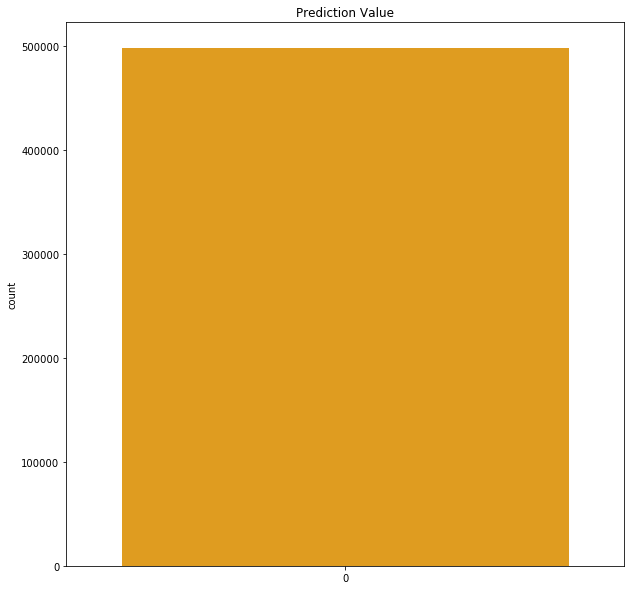

In [83]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
plt.title("Prediction Value")
sn.countplot(y_pred_testing, color="orange")

# PREPARE RESULT 


In [84]:
df_test = pd.read_csv("test.csv",sep="|")
df_test["fraud"] = pd.DataFrame(y_pred_testing)
df_test

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000,0
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857,0
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667,0
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222,0


# INTERPRETATION 

In [85]:
color=['blue','orange']
data = df_test.sample(n=20000)
data.loc[data['fraud']== 0 ,'color'] = "blue"
data.loc[data['fraud']== 1 ,'color'] = "red"

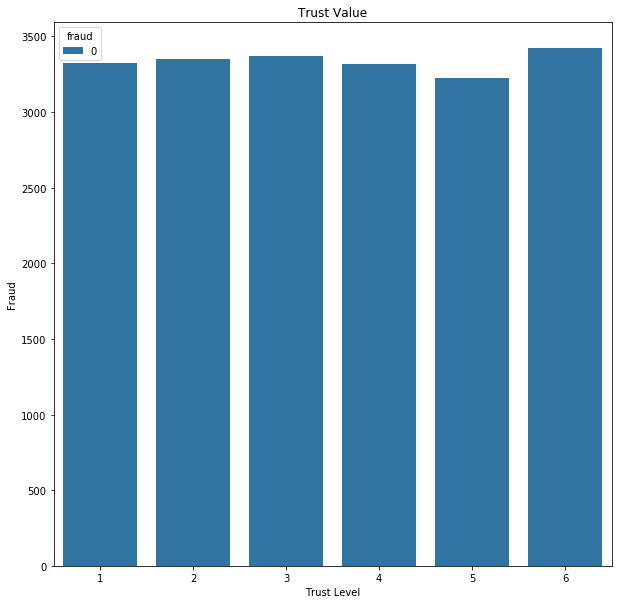

In [86]:
plt.figure(figsize=(10,10))
plt.title("Trust Value")
sn.countplot(x=data["trustLevel"], hue=data["fraud"], data=data)
plt.xlabel('Trust Level')
plt.ylabel('Fraud')
plt.show()